# BAB 1: INTRODUCTION

# BAB 2: IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re

# Splitting
from sklearn.model_selection import train_test_split

# Imputer
from sklearn.impute import KNNImputer

from scipy.stats import iqr

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop


# Pipeline
from sklearn.pipeline import Pipeline

# Transformer
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error


# BAB 3: DATA LOADING

In [2]:
pd.set_option("display.max_columns", 500)
raw_data= pd.read_csv("data/Property_Scraping.csv")
data = raw_data.copy()
data

,url,title,description,price,address,city,land_size_m2,building_size_m2,bedroom,bathroom,garage,carport,property_type,certificate,voltage_watt,maid_bedroom,maid_bathroom,kitchen,dining_room,living_room,furniture,building_material,floor_material,floor_level,house_facing,concept_and_style,view,internet_access,road_width,year_built,year_renovated,water_source,corner_property,property_condition,ad_type,ad_id
0,/properti/tangerang/hos16543378/,Rumah 2 Lantai Bagus Semi Furnished Sertifikat...,Dijual Termurah Rumah Budi Indah Daan Mogot Si...,8.500000e+08,"Daan Mogot, Tangerang",Tangerang,57,114.0,3.0,2.0,1.0,1.0,Rumah,SHM - Sertifikat Hak Milik,2200.0,1.0,0.0,0.0,0.0,0.0,Semi Furnished,NaN,NaN,2.0,NaN,NaN,NaN,NaN,Row Jalan 2 Mobil,NaN,NaN,Pam,False,Full Renovasi,NaN,NaN
1,/properti/jakarta-selatan/hos18392523/,Rumah Asri Dan Eklusive Dikawasan Pemukiman Po...,Dijual Rumah Asri dan Nyaman di lingkungan yan...,4.950000e+09,"Kebayoran Lama, Jakarta Selatan",Jakarta Selatan,320,450.0,5.0,3.0,0.0,2.0,Rumah,SHM - Sertifikat Hak Milik,4400.0,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,2.0,NaN,Moderen dan Eklusive,NaN,NaN,2 Mobil,NaN,NaN,NaN,NaN,terawat,Dijual Cepat,NaN
2,/properti/depok/hos18570241/,Rumah Di Perum Lereng Indah Cinere Perbatasan ...,"Dijual Cepat Rumah Di Perum Lereng Indah, Pond...",5.900000e+08,"Perum Lereng Indah, Pondok Cabe, Cinere",Depok,78,36.0,2.0,1.0,0.0,1.0,Rumah,SHM - Sertifikat Hak Milik,1200.0,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,1.0,East,NaN,NaN,NaN,1mobil,NaN,NaN,Air tanah,False,NaN,Dijual Cepat,NaN
3,/properti/jakarta-utara/hos16808954/,DIJUAL TERMURAH RUMAH PIK1 Layar Permai 2 Lant...,DIJUAL TERMURAH RUMAH PIK1 Layar Permai 4x12 2...,1.750000e+09,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,48,96.0,2.0,2.0,0.0,1.0,Rumah,SHM - Sertifikat Hak Milik,2200.0,1.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2 Mobil,NaN,NaN,NaN,NaN,Rapi Terawat,DIJUAL,NaN
4,/properti/jakarta-selatan/hos16169877/,"Dijual Rumah Di Guntur Area Komersil, Setiabud...","Dijual Rumah di Guntur Area Komersil, Setiabud...",6.700000e+09,"Guntur, Jakarta Selatan",Jakarta Selatan,180,135.0,2.0,1.0,0.0,2.0,Rumah,SHM - Sertifikat Hak Milik,NaN,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,0.0,East,NaN,NaN,NaN,2 mobil,NaN,NaN,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,/properti/cianjur/las2606466/,"Tanah Lahan Murah Siap Bangun Luas 5,8 Hektar ...",Jual Segera Tanah Lahan Murah Siap Bangun Deng...,1.740000e+10,"Cikalongkulon, Cianjur",Cianjur,58235,0.0,NaN,0.0,0.0,0.0,NaN,SHM - Sertifikat Hak Milik,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dijual,las2606466
1394,/properti/bogor/was2874809/,Gudang Murah Dengan Luas 5.000m di Tengsaw Cit...,Jual Cepat Gudang Murah Dengan Luas 5.000m di ...,2.700000e+10,"Citeureup, Bogor",Bogor,5000,2000.0,2.0,2.0,0.0,0.0,NaN,SHM - Sertifikat Hak Milik,NaN,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,Dijual,was2874809
1395,/properti/depok/hos5443725/,"Rumah 1 lantai didalam cluster di Krukut Limo,...",Hanya 3 km ke Jakarta Selatan 300m dari pintu ...,1.150000e+09,NaN,Depok,102,70.0,2.0,2.0,0.0,0.0,Rumah,SHM - Sertifikat Hak Milik,NaN,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,/properti/jakarta-pusat/hos8665955/,Rumah murah tangerang siap huni 2 kamar tidur ...,Puri Harmoni Cikasungka\n\nRumah Subsidi Pemer...,1.680000e+08,"Tanah Abang, Jakarta Pusat",Jakarta Pusat,60,28.0,2.0,1.0,0.0,1.0,Rumah,SHM - Sertifikat Hak Milik,1300.0,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# BAB 4: EXPLORATORY DATA ANALYSIS (EDA)

## 4.1. Cek Data Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 1398 non-null   object 
 1   title               1396 non-null   object 
 2   description         1396 non-null   object 
 3   price               1396 non-null   float64
 4   address             1299 non-null   object 
 5   city                1396 non-null   object 
 6   land_size_m2        1398 non-null   int64  
 7   building_size_m2    1398 non-null   float64
 8   bedroom             1224 non-null   float64
 9   bathroom            1394 non-null   float64
 10  garage              1330 non-null   float64
 11  carport             1392 non-null   float64
 12  property_type       1046 non-null   object 
 13  certificate         1395 non-null   object 
 14  voltage_watt        909 non-null    float64
 15  maid_bedroom        1393 non-null   float64
 16  maid_b

## Cek Duplicate

In [4]:
data.duplicated().sum()

0

## Handling Duplicate

In [5]:
data = data.drop_duplicates()

print(data.duplicated().sum())

0


## Cek Unique dan Cardinality

In [6]:
def unique_check_all(df):
    # Tampilan dengan max column
    pd.set_option('display.max_colwidth', None)

    # output bernama listItem
    listItem = []

    # Looping column di dalam dataframe
    for col in df.columns:
        # Menambahkan 'nama kolom', 'jumlah nilai unique', 'nilai unique' ke listItem
        listItem.append([col, df[col].nunique(), df[col].unique()])

    # Hasil dalam dataframe
    summary_cardinality= pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

    return summary_cardinality

In [7]:
unique_check_all(data)

nama kolom  jumlah nilai unique  \
0                  url                 1396   
1                title                 1345   
2          description                 1339   
3                price                  429   
4              address                  534   
5                 city                   42   
6         land_size_m2                  420   
7     building_size_m2                  342   
8              bedroom                   29   
9             bathroom                   26   
10              garage                   13   
11             carport                   13   
12       property_type                    3   
13         certificate                   25   
14        voltage_watt                   61   
15        maid_bedroom                    6   
16       maid_bathroom                    5   
17             kitchen                    4   
18         dining_room                    3   
19         living_room                    4   
20           furniture                    3   
21   building_material                   47   
22      floor_material                   39   
23         floor_level                   29   
24        house_facing                    8   
25   concept_and_style                   69   
26                view                   64   
27     internet_access                   24   
28          road_width                  145   
29          year_built                   24   
30      year_renovated                    5   
31        water_source                  120   
32     corner_property                    2   
33  property_condition                  126   
34             ad_type                   17   
35               ad_id                  567   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## Handling Cardinality

### Price

In [8]:
# Rename the column and convert the values to millions
data = data.rename(columns={"price": "price_mio"})
data["price_mio"] = data["price_mio"] / 1_000_000

### City

In [9]:
data.loc[:, 'city'] = data['city'].apply(lambda x: x.split(', ')[1] if isinstance(x, str) and ', ' in x else x)

# List kata kunci untuk kota Jabodetabek (menggunakan kata kunci seperti 'Jakarta' dan 'Bogor')
jabodetabek_keywords = ['Jakarta', 'Bogor', 'Depok', 'Tangerang', 'Bekasi']

# Filter untuk hanya menyertakan data dengan kota yang mengandung kata kunci Jabodetabek
data = data[data['city'].str.contains('|'.join(jabodetabek_keywords), case=False, na=False)]

Memastikan seluruh city berada pada wilayah jabodetabek

In [10]:
# Keywords for classification
keywords = {
    r'jakarta': 'Jakarta',
    r'bogor': 'Bogor',
    r'depok': 'Depok',
    r'tangerang': 'Tangerang',
    r'bekasi': 'Bekasi'
}

# Step 1: Classification based on 'address' column
for pattern, city_name in keywords.items():
    data.loc[
        data['city'].isna() & data['address'].str.contains(pattern, case=False, na=False),
        'city'
    ] = city_name

# Step 2: Classification based on 'title' column
for pattern, city_name in keywords.items():
    data.loc[
        data['city'].isna() & data['title'].str.contains(pattern, case=False, na=False),
        'city'
    ] = city_name

# Step 3: Standardize the city column using regex
for pattern, city_name in keywords.items():
    data['city'] = data['city'].str.replace(rf'.*{pattern}.*', city_name, case=False, regex=True)

# Step 4: Remove any additional spaces and ensure consistency
data['city'] = data['city'].str.strip()

# Verify the output
print(data['city'].value_counts())

city
Jakarta      823
Tangerang    226
Bogor        124
Bekasi        94
Depok         74
Name: count, dtype: int64


### Property Type

In [11]:
# Daftar kata kunci
keywords = {
    r'rumah|house|mansion': 'Rumah',
    r'apartment|apartmen|apartement|apartemen|kos|kost': 'Hunian Sewa',
    r'pabrik|kantor|office|ruko|ruang usaha|kios|kiosk|gudang': 'Ruang Usaha',
    r'tanah|lahan|kavling|gedung': 'Tanah dan Properti Lain'
}

# Normalisasi awal
data['property_type'] = data['property_type'].str.lower().str.strip()

# Klasifikasi berdasarkan 'property_type'
for pattern, prop_type in keywords.items():
    data.loc[
        data['property_type'].str.contains(pattern, case=False, na=False),
        'property_type'
    ] = prop_type

# Klasifikasi berdasarkan 'title'
for pattern, prop_type in keywords.items():
    data.loc[
        data['property_type'].isna() & data['title'].str.contains(pattern, case=False, na=False),
        'property_type'
    ] = prop_type

# Klasifikasi berdasarkan 'description'
for pattern, prop_type in keywords.items():
    data.loc[
        data['property_type'].isna() & data['description'].str.contains(pattern, case=False, na=False),
        'property_type'
    ] = prop_type

# Klasifikasi tipe rumah berdasarkan ukuran bangunan
def determine_house_type(row):
    if row['property_type'] == 'Rumah':
        size = row.get('building_size_m2', None)
        if size is None:
            return 'Rumah Tipe Tidak Diketahui'
        elif size <= 21:
            return 'Rumah Tipe 21'
        elif 21 < size <= 36:
            return 'Rumah Tipe 36'
        elif 36 < size <= 45:
            return 'Rumah Tipe 45'
        elif 45 < size <= 54:
            return 'Rumah Tipe 54'
        elif 54 < size <= 60:
            return 'Rumah Tipe 60'
        elif 60 < size <= 70:
            return 'Rumah Tipe 70'
        elif 70 < size <= 120:
            return 'Rumah Tipe 120'
        else:
            return 'Rumah Tipe >120'
    return row['property_type']  # Return original property_type for non-Rumah rows

# Update property_type with house_type where applicable
data['property_type'] = data.apply(determine_house_type, axis=1)

# Output hasil
data.property_type.value_counts()

property_type
Rumah Tipe >120            708
Rumah Tipe 120             233
Ruang Usaha                100
Tanah dan Properti Lain     90
Hunian Sewa                 79
Rumah Tipe 70               34
Rumah Tipe 60               26
Rumah Tipe 36               24
Rumah Tipe 54               24
Rumah Tipe 45               17
Rumah Tipe 21                6
Name: count, dtype: int64

In [12]:
data = data[(data['property_type'] != 'Tanah dan Properti Lain') &
                 (data['property_type'] != 'Hunian Sewa') &
                 (data['property_type'] != 'Ruang Usaha')]

data.property_type.unique()

array(['Rumah Tipe 120', 'Rumah Tipe >120', 'Rumah Tipe 36',
       'Rumah Tipe 70', 'Rumah Tipe 54', 'Rumah Tipe 45', 'Rumah Tipe 60',
       'Rumah Tipe 21'], dtype=object)

### Certificate

In [13]:
# Define a function to categorize values
def certificate(value):
    if pd.isna(value):  # Handle NaN values
        return np.nan
    elif 'SHM' in value:  # If the value contains 'SHM'
        return 'SHM'
    elif 'HGB' in value:  # If the value contains 'HGB'
        return 'HGB'
    else:  # If the value doesn't contain 'SHM' or 'HGB'
        return 'Other'

# Apply the function to the 'certificate' column directly
data.loc[:,'certificate'] = data['certificate'].apply(certificate)

data.certificate.value_counts()

certificate
SHM      887
Other    133
HGB       49
Name: count, dtype: int64

### Property Condition

In [14]:
# Fungsi untuk mengelompokkan berdasarkan kesamaan kata

def categorize(value):
    if pd.isnull(value):  # Tetap NaN jika value adalah NaN
        return pd.NA
    
    value_lower = str(value).lower()
    
    # Renovated: Properti yang telah direnovasi
    renovated_keywords = ['renov', 'full renov', 'renovasi', 'renoved', 'renovasi baru', 'baru renovasi', 'finished', 'selesai renovasi', 'proses finishing']
    if any(keyword in value_lower for keyword in renovated_keywords):
        return 'Renovated'
    
    # New: Properti yang baru atau baru dibangun
    new_keywords = ['new', 'brand new', 'baru', 'unit baru', 'first time', 'primery', 'full baru', 'baru selesai', 'unit baru gress']
    if any(keyword in value_lower for keyword in new_keywords):
        return 'New'
    
    # Need Renovation: Properti yang membutuhkan renovasi atau perawatan
    need_renovation_keywords = ['butuh renovasi', 'harus renovasi', 'setengah jadi', 'perlu renovasi', 'perlu perawatan', 'lama', 'tua']
    if any(keyword in value_lower for keyword in need_renovation_keywords):
        return 'Need Renovation'
    
    # Well Maintained: Properti yang terawat dan siap huni
    well_maintained_keywords = ['terawat', 'siap huni', 'bersih', 'rapi', 'kokoh', 'bagus', 'layak huni', 'ready to move', 'well maintained', 'layak', 'baik', 'well']
    if any(keyword in value_lower for keyword in well_maintained_keywords):
        return 'Well Maintained'
    
    # Jika tidak cocok dengan kategori apapun, beri nilai NaN (opsional)
    return pd.NA

# Terapkan fungsi kategori
data.loc[:,'property_condition'] = data['property_condition'].apply(lambda x: categorize(x))

data.property_condition.value_counts()

property_condition
Well Maintained    138
New                103
Renovated           25
Need Renovation     17
Name: count, dtype: int64

### Water Source

In [15]:
keywords_water = {
    'PAM/PDAM': r'\b(?:pam|pdam|air pam|air pdam|pln pam|aetra|water treatment|palyja)\b',
    'Sumber Air': r'\b(?:sumur|jet pump|jetpump|sumur bor|air sumur|bor|tanah|air tanah|filter|osmosis|reverse osmosis|sistem filter|pompa|submersible pump|water pump|mata air|air alami|wtp|jetpam|air jet pum|air ready|langsung dari sumbernya|air bagus|sumber air)\b',
    'Gabungan': r'\b(?:pdam\s?\+?\s?sumur|pam\s?\+?\s?tanah|air jetpump)\b'
}

data['water_source'] = data['water_source'].str.lower().str.strip()

# Check and classify rows where 'water_source' is not missing
for category, pattern in keywords_water.items():
    data.loc[data['water_source'].str.contains(pattern, case=False, na=False), 'water_source'] = category

# Step 2: Handle missing 'water_source' values by checking the 'description' for matching keywords
for category, pattern in keywords_water.items():
    data.loc[data['water_source'].isna() & data['description'].str.contains(pattern, case=False, na=False), 'water_source'] = category

# Periksa distribusi kategori
data.water_source.value_counts()


water_source
Sumber Air    555
PAM/PDAM      238
Name: count, dtype: int64

### Road Width

In [16]:
def convert_to_meter(value):
    if pd.isnull(value):  # Jika nilai NaN
        return np.nan
    
    value_lower = str(value).lower()
    
    # Ukuran dalam meter eksplisit
    if 'meter' in value_lower or 'mtr' in value_lower:
        match = re.search(r'(\d+\.?\d*)\s?(meter|mtr)', value_lower)
        if match:
            return float(match.group(1))
    
    # Kondisi 1 mobil
    if any(keyword in value_lower for keyword in ['1 mobil', '1mobil', '1 mbl', '1 arah mobil']):
        return 2.5
    
    # Kondisi 2 mobil
    if any(keyword in value_lower for keyword in ['2 mobil', '2 mobil lega', '2-3 mobil', '2 mobil pas', '2 mbl', 'akses jalan 2 mobil', '2 mobil 2 arah', 'row jalan 2 mobil', '2.5 mobil', '2mob', '2row']):
        return 5
    
    # Kondisi 3 mobil
    if any(keyword in value_lower for keyword in ['3 mobil', '3 row', '3 mbl', 'jalan 3 mobil', 'row jalan 3 mobil', '3 mobil lebih', '3mob']):
        return 7.5
    
    # Kondisi 4 mobil
    if any(keyword in value_lower for keyword in ['4 mobil', '4 mbl']):
        return 10
    
    # Kondisi lebih dari 4 mobil
    if any(keyword in value_lower for keyword in ['5 mobil', '6 mobil', '7 mobil', '8 mobil', 'lebih dari 4 mobil']):
        return 12
    
    # Kondisi lebar jalan besar atau akses jalan lebar
    if any(keyword in value_lower for keyword in ['lebar', 'besar', 'akses jalan', 'jalan besar']):
        return 5
    
    # Kondisi "super lebar"
    if 'super lebar' in value_lower:
        return 15
    
    # Jika tidak cocok dengan kategori apapun, beri nilai NaN (opsional)
    return np.nan

# Terapkan konversi ke meter
data.loc[:,'road_width'] = data['road_width'].apply(convert_to_meter)
# Convert 'voltage_watt' to float, with error handling for non-numeric values
data.road_width = pd.to_numeric(data['road_width'], errors='coerce')

data["road_width"].unique()

array([ 5. ,  2.5,  nan,  7.5,  8. , 45. ,  6. ,  7. , 10. ,  9. , 12. ])

## Cek Missing Value

In [17]:
data.isnull().sum()

url                      0
title                    0
description              0
price_mio                0
address                 65
city                     0
land_size_m2             0
building_size_m2         0
bedroom                 23
bathroom                 2
garage                  66
carport                  4
property_type            0
certificate              3
voltage_watt           291
maid_bedroom             3
maid_bathroom           16
kitchen                144
dining_room            199
living_room            192
furniture              210
building_material     1006
floor_material        1014
floor_level             31
house_facing           722
concept_and_style      937
view                  1025
internet_access       1029
road_width             849
year_built            1029
year_renovated        1063
water_source           279
corner_property        717
property_condition     789
ad_type                588
ad_id                  787
dtype: int64

## Mendefinisikan Kolom kategorikal dan Numerikal

In [18]:
# Select numeric columns
num_cols = ['land_size_m2',
            'building_size_m2',
            'road_width',
            'maid_bedroom',
            'maid_bathroom',
            'kitchen',
            'floor_level',
            'bedroom',
            'bathroom',
            'garage',
            'carport',
            'voltage_watt']

cat_cols = ['city',
            'property_type',
            'certificate',
            'furniture',
            'house_facing',
            'water_source',
            'property_condition'
            ]

In [19]:
df = data[['land_size_m2',
          'building_size_m2',
          'road_width',
          'city',
          'property_type',
          'certificate',
          'furniture',
          'house_facing',
          'water_source',
          'property_condition',
          'bedroom',
          'bathroom',
          'garage',
          'carport',
          'voltage_watt',
          'maid_bedroom',
          'maid_bathroom',
          'kitchen',
          'floor_level',
          'price_mio']]

## Capping Outlier

In [20]:
data.price_mio.describe()

count      1072.000000
mean       5656.941652
std       10494.814240
min           0.000007
25%        1450.000000
50%        2800.000000
75%        5800.000000
max      125000.000000
Name: price_mio, dtype: float64

In [152]:
df = data[data["price_mio"]<5800]

# BAB 5: FEATURE ENGINEERING

## Split antara X (Features) dan y (Target)

In [153]:
# Split kolom features dan target
X = df.drop('price_mio', axis=1) # Features
y = df['price_mio']               # Target

In [154]:
# Split dataset into training+validation and test subsets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=365)

# Further split training+validation into training and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=365)

## Handling Missing Value

In [155]:
def impute_with_knn(X_train, X_val, X_test, num_cols, cat_cols):
    # Create deep copies to avoid modifying original dataframes
    X_train_imputed = X_train.copy(deep=True)
    X_val_imputed = X_val.copy(deep=True)
    X_test_imputed = X_test.copy(deep=True)
    
    # Prepare data with numeric columns and encoded categorical columns
    def prepare_data_for_imputation(df, label_encoders):
        # Create a copy of the dataframe
        prepared_df = df.copy(deep=True)
        
        # Handle numeric columns
        for col in num_cols:
            # Replace NaNs with median for numeric columns
            prepared_df[col] = prepared_df[col].fillna(prepared_df[col].median())
        
        # Handle categorical columns
        for col in cat_cols:
            # If encoder exists, use it, otherwise create a new one
            if col not in label_encoders:
                # Combine unique values from both train and test
                combined_categories = pd.concat([X_train[col], X_val[col], X_test[col]]).dropna().unique()
                
                # Create LabelEncoder with combined categories
                le = LabelEncoder()
                le.fit(combined_categories.astype(str))
                label_encoders[col] = le
            
            # Get the encoder for this column
            le = label_encoders[col]
            
            # Create a copy of the column for transformation
            col_to_encode = prepared_df[col].copy()
            
            # Replace NaNs with a special category that is in the original categories
            col_to_encode = col_to_encode.fillna(le.classes_[0])
            
            # Transform categorical columns
            prepared_df[col] = le.transform(col_to_encode.astype(str))
        
        return prepared_df, label_encoders
    
    # Dictionary to store label encoders
    label_encoders = {}
    
    # Prepare train and test data
    X_train_prep, label_encoders = prepare_data_for_imputation(X_train, label_encoders)
    X_val_prep, label_encoders = prepare_data_for_imputation(X_val, label_encoders)
    X_test_prep, label_encoders = prepare_data_for_imputation(X_test, label_encoders)
    
    # Combine all columns to impute
    cols_to_impute = num_cols + cat_cols
    
    # Prepare data for KNN Imputer
    X_train_to_impute = X_train_prep[cols_to_impute]
    X_val_to_impute = X_val_prep[cols_to_impute]
    X_test_to_impute = X_test_prep[cols_to_impute]
    
    # Initialize KNN Imputer
    knn_imputer = KNNImputer(n_neighbors=5)
    
    # Fit and transform training data
    X_train_imputed_values = knn_imputer.fit_transform(X_train_to_impute)
    
    # Fit and transform training data
    X_val_imputed_values = knn_imputer.fit_transform(X_val_to_impute)

    # Transform test data
    X_test_imputed_values = knn_imputer.transform(X_test_to_impute)
    
    # Update the original dataframes with imputed values
    X_train_imputed[cols_to_impute] = X_train_imputed_values
    X_val_imputed[cols_to_impute] = X_val_imputed_values
    X_test_imputed[cols_to_impute] = X_test_imputed_values
    
    # Decode categorical columns
    for col in cat_cols:
        # Inverse transform categorical columns
        X_train_imputed[col] = label_encoders[col].inverse_transform(
            X_train_imputed[col].astype(int)
        )
        X_val_imputed[col] = label_encoders[col].inverse_transform(
            X_val_imputed[col].astype(int)
        )
        X_test_imputed[col] = label_encoders[col].inverse_transform(
            X_test_imputed[col].astype(int)
        )
    
    return X_train_imputed, X_val_imputed, X_test_imputed

# Call the imputation function
X_train_imputed, X_val_imputed, X_test_imputed = impute_with_knn(X_train, X_val, X_test, num_cols, cat_cols)

In [156]:
X_train_imputed

,url,title,description,address,city,land_size_m2,building_size_m2,bedroom,bathroom,garage,carport,property_type,certificate,voltage_watt,maid_bedroom,maid_bathroom,kitchen,dining_room,living_room,furniture,building_material,floor_material,floor_level,house_facing,concept_and_style,view,internet_access,road_width,year_built,year_renovated,water_source,corner_property,property_condition,ad_type,ad_id
224,/properti/jakarta-timur/hos13542338/,"Rumah Minimalis Lt 105 M2 di Rawamangun, Jakarta Timur Murah","Dijual Rumah minimalis lt 105 m2 di rawamangun, jakarta timur murah bangunan 2 Lantai Bangunan Full Baru LT : 7 X 15 (105 m2) LB : +/- 155 Meter Kamar : 3 + 1 Kamar Mandi : 3 + 1 Carport : 1 Mobil Dapur + Kitchenset ( Bonus Kompor Modena + Exhaust ) Air Sumur Dan Air Pam Instalasi Air Panas Instalasi Ac, CCTV , Telepon Dan Internet SHM / IMB Harga 3,5m nego IDH minat??hubungi: Hendra 082260808xxx","Rawamangun, Jakarta Timur",Jakarta,105.0,155.0,3.0,3.0,0.0,1.0,Rumah Tipe >120,SHM,3500.0,1.0,1.0,1.0,NaN,NaN,Furnished,NaN,NaN,2.0,East,NaN,NaN,Yes,5.0,NaN,NaN,PAM/PDAM,NaN,New,Dijual,IDH
1302,/properti/jakarta-utara/hos17025269/,"Dijual Rumah di Pantai Indah Kapuk, Pik2 Tahap 1","Dijual Rumah di Pantai Indah Kapuk, Pik2 Tahap 1 LT : 60m2 (6x10) LB : LB : 79M2 2lantai Kt 2 km 2 Semi Furnish Cakep, Renovasi Interior Ppjb Harga Jual : 2M Wa.me/6281381125xxx Sisca GP Pik #dijualrumah #rumahmurah #kpr #jual #rumah #tanah #kavling #pabrik #ruko #gudang #perkantoran #kantor #apartemen #properti #property #jabodetabek #gadingpropik #sisca #jualkavling #kavlingpik #jualkavlingpik #jualrumahpik2 #pik2 #rumahclusterpik2 #scarlet #atlanta #denver #miami #rumahpik2clustermagenta #dijualrumahpik2 #clustermagenta",Pantai Indah Kapuk 2,Jakarta,60.0,79.0,3.0,2.0,0.0,1.0,Rumah Tipe 120,Other,3500.0,0.0,0.0,0.0,0.0,0.0,Semi Furnished,NaN,NaN,2.0,East,NaN,NaN,NaN,5.0,NaN,NaN,Sumber Air,NaN,Need Renovation,NaN,NaN
1255,/properti/tangerang/hos16465051/,Rumah 2 Lantai Bagus Furnished Di Metro Permata 1 Tangerang,"Rumah berkonsep Modern Luas tanah 129m di Hook Hadap Timur Utara Fasilitas dekat lapangan Basket Keamanan hanya 200,000 perbulan Ruko kedepan hanya 10 menit Ke area Kharinda atau Alfa hanya 5 menit Dekat sekolah, Mall Puri Indah, Mall Living World karena Tol Tangerang dan Jabodetabek hanya 2km.",NaN,Tangerang,129.0,200.0,4.0,3.0,0.0,1.0,Rumah Tipe >120,SHM,5500.0,0.0,0.0,0.0,0.0,0.0,Furnished,NaN,NaN,2.0,Northeast,Modern,NaN,NaN,5.0,NaN,NaN,Sumber Air,True,Need Renovation,NaN,NaN
1124,/properti/bekasi/hos18814222/,RUMAH BRAND NEW 2 LANTAI CANTIK DI PREMIER SAVANA BEKASI,"RUMAH BRAND NEW 2 LANTAI CANTIK DI PREMIER SAVANA BEKASI Lokasi strategis Tepat di depan Binus International school Bekasi Berada di jalur utama jalan besar menghubungkan Bogor & Bekasi Sudah ada fasilitas manuju Bandara Soeta menggunakan JA Connexion ( JABODETABEK AIRPORT) Dekat ke : Little talk caffe, restoran Mang Kabayan, Klinik Bunda, GOR vida, Pasar Anyar, Rencana Kota Cinema Mall,dll.","Narogong, Bekasi",Bekasi,84.0,69.0,3.0,2.0,0.0,1.0,Rumah Tipe 70,SHM,2200.0,0.0,0.0,0.0,0.0,0.0,Furnished,NaN,NaN,2.0,South,NaN,NaN,NaN,5.0,NaN,NaN,PAM/PDAM,NaN,Need Renovation,NaN,RSY #197839
1023,/properti/tangerang/hos16574366/,"DIJUAL RUMAH DI SUTERA FLAMBOYAN, ALAM SUTERA Rumah 2 Lantai","DIJUAL RUMAH DI SUTERA FLAMBOYAN, ALAM SUTERA Rumah 2 Lantai LT : 112 m2 (7×16m) LB : 170 m2 KT : 3 KM : 3 Hadap : Selatan (Badan) Sertifikat Hak Milik Unfurnished Harga Jual : 2.9M (nego)","Sutera Flamboyan, Alam Sutera",Tangerang,112.0,170.0,3.0,3.0,0.0,2.0,Rumah Tipe >120,SHM,3500.0,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,2.0,South,NaN,NaN,NaN,5.0,NaN,NaN,PAM/PDAM,NaN,Need Renovation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,/properti/depok/hos18243214/,Rumah Baru Konsep American Style di Cinere Dekat Pintu Tol Brigif,"Dijual Rumah Baru Konsep American Style di Cinere Dekat Pintu Tol Bri

## Cek Outlier dan Skewness

In [157]:

def check_outlier(data, cols):
    '''
    Fungsi ini digunakan untuk mengecek nilai lower bound dan upper bound data serta persentase data outlier. 
    Fungsi ini hanya bisa digunakan untuk kolom numeric. Pastikan parameter cols hanya berisi kolom dengan tipe data numeric.
    Fungsi ini akan mengabaikan nilai missing value.
    '''
    
    skewness = [data[col].dropna().skew() for col in cols]  # Mengabaikan nilai NaN saat menghitung skewness

    listItem = []  # List untuk menyimpan setiap row hasil per kolom

    for id, col in enumerate(cols):
        # Mengabaikan nilai NaN pada kolom yang sedang dianalisis
        col_data = data[col].dropna()

        if skewness[id] > 1 or skewness[id] < -1:
            category = 'Highly Skewed'
            IQR = iqr(col_data)
            lower_boundary = col_data.quantile(0.25) - 3 * IQR
            upper_boundary = col_data.quantile(0.75) + 3 * IQR
        elif skewness[id] > 0.5 or skewness[id] < -0.5:
            category = 'Moderately Skewed'
            IQR = iqr(col_data)
            lower_boundary = col_data.quantile(0.25) - 1.5 * IQR
            upper_boundary = col_data.quantile(0.75) + 1.5 * IQR
        else:
            category = 'Normal'
            lower_boundary = col_data.mean() - 3 * col_data.std()
            upper_boundary = col_data.mean() + 3 * col_data.std()

        # Menghitung outlier pada data yang telah di-drop NaN-nya
        outlier = col_data[(col_data > upper_boundary) | (col_data < lower_boundary)]
        outlier_num = len(outlier)
        outlier_percent = outlier_num / len(col_data) * 100  # Menggunakan panjang kolom tanpa NaN

        # Append hasil analisis ke listItem sebagai satu row
        listItem.append([
            col,                      # Nama Kolom
            round(skewness[id], 2),    # Skewness
            category,                  # Kategori Distribusi
            round(lower_boundary, 2),  # Lower Boundary
            round(upper_boundary, 2),  # Upper Boundary
            outlier_num,               # Jumlah Outlier
                        round(outlier_percent, 2)  # Persentase Outlier
        ])

    # Membuat DataFrame dari listItem
    df_distribution = pd.DataFrame(listItem, columns=[
        'Column', 'Skewness', 'Distribution', 'LowerBoundary', 'UpperBoundary', 'Jumlah Outlier', 'Percent Outlier (%)'
    ])

    return df_distribution

In [158]:
X_train_distribution = check_outlier(X_train_imputed,num_cols)

print("Distribusi data value pada X_train:")
X_train_distribution

Distribusi data value pada X_train:


,Column,Skewness,Distribution,LowerBoundary,UpperBoundary,Jumlah Outlier,Percent Outlier (%)
0,land_size_m2,2.55,Highly Skewed,-138.0,366.0,18,3.31
1,building_size_m2,1.41,Highly Skewed,-320.0,625.0,1,0.18
2,road_width,2.43,Highly Skewed,5.0,5.0,17,3.13
3,maid_bedroom,0.76,Moderately Skewed,-1.5,2.5,0,0.00
4,maid_bathroom,0.91,Moderately Skewed,-1.5,2.5,0,0.00
5,kitchen,2.47,Highly Skewed,0.0,0.0,83,15.29
6,floor_level,9.36,Highly Skewed,-6.0,8.0,6,1.10
7,bedroom,6.32,Highly Skewed,0.0,7.0,15,2.76
8,bathroom,6.54,Highly Skewed,-1.0,6.0,10,1.84
9,garage,4.55,Highly Skewed,0.0,0.0,51,9.39


Tidak handling outlier karena nilai skewnya kecil

## Feature Selection

### Correlation Test

In [159]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau, normaltest

def check_correlation(X, y, num_cols, cat_cols):
    # Initialize lists to store results
    cols = []
    jenis_col = []
    metode_uji = []
    corr = []
    p_values = []
    interpretasi = []

    # Menguji kolom numerik: Pearson atau Spearman, tergantung pada distribusi
    for col in num_cols:
        # Menguji apakah data normal menggunakan normaltest
        _, p_normal = normaltest(X[col].dropna())

        if p_normal > 0.05:  # Data berdistribusi normal
            corr_coef, p_value = pearsonr(X[col], y)
            metode = 'Pearson'
        else:  # Data tidak berdistribusi normal
            corr_coef, p_value = spearmanr(X[col], y)
            metode = 'Spearman'

        cols.append(col)
        jenis_col.append('numerical')
        metode_uji.append(metode)
        corr.append(corr_coef)
        p_values.append(p_value)
        interpretasi.append('Ada korelasi' if p_value < 0.05 else 'Tidak ada korelasi')

    # Menguji kolom kategorikal menggunakan Kendall
    for col in cat_cols:
        corr_coef, p_value = kendalltau(X[col], y)
        cols.append(col)
        jenis_col.append('categorical')
        metode_uji.append('Kendall Tau')
        corr.append(corr_coef)
        p_values.append(p_value)
        interpretasi.append('Ada korelasi' if p_value < 0.05 else 'Tidak ada korelasi')

    # Membuat DataFrame untuk menampilkan hasil
    result_df = pd.DataFrame({
        'Nama Kolom': cols,
        'Jenis Kolom': jenis_col,
        'Metode Uji': metode_uji,
        'Nilai Korelasi': corr,
        'p_value': p_values,
        'Hasil': interpretasi
    })

    return result_df

In [160]:
check_correlation(X_train_imputed, y_train, num_cols, cat_cols)

,Nama Kolom,Jenis Kolom,Metode Uji,Nilai Korelasi,p_value,Hasil
0,land_size_m2,numerical,Spearman,0.520290,5.403401e-39,Ada korelasi
1,building_size_m2,numerical,Spearman,0.670047,4.984212e-72,Ada korelasi
2,road_width,numerical,Spearman,0.050407,2.409426e-01,Tidak ada korelasi
3,maid_bedroom,numerical,Spearman,0.513051,8.659250e-38,Ada korelasi
4,maid_bathroom,numerical,Spearman,0.485049,2.164306e-33,Ada korelasi
5,kitchen,numerical,Spearman,0.160549,1.720017e-04,Ada korelasi
6,floor_level,numerical,Spearman,0.417851,2.334699e-24,Ada korelasi
7,bedroom,numerical,Spearman,0.480962,8.788632e-33,Ada korelasi
8,bathroom,numerical,Spearman,0.625851,2.204720e-60,Ada korelasi
9,garage,numerical,Spearman,0.235413,2.836383e-08,Ada korelasi


In [161]:
X_train_imputed.columns

Index(['url', 'title', 'description', 'address', 'city', 'land_size_m2',
       'building_size_m2', 'bedroom', 'bathroom', 'garage', 'carport',
       'property_type', 'certificate', 'voltage_watt', 'maid_bedroom',
       'maid_bathroom', 'kitchen', 'dining_room', 'living_room', 'furniture',
       'building_material', 'floor_material', 'floor_level', 'house_facing',
       'concept_and_style', 'view', 'internet_access', 'road_width',
       'year_built', 'year_renovated', 'water_source', 'corner_property',
       'property_condition', 'ad_type', 'ad_id'],
      dtype='object')

## Scaling and Encoding

In [162]:
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_cols),
    ('pipe_cat', cat_pipeline, cat_cols)
])

In [163]:
# Fit and Transform

X_train_scaled = final_pipeline.fit_transform(X_train_imputed)
X_val_scaled = final_pipeline.transform(X_val_imputed)
X_test_scaled = final_pipeline.transform(X_test_imputed)
X_train_scaled.shape

(543, 45)

# BAB 6: MODELING

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.initializers import HeNormal

# Set seed
seed = 30

# Clear session
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Build model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_initializer=HeNormal(seed)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_initializer=HeNormal(seed)),
    Dropout(0.2),
    Dense(8, activation='relu', kernel_initializer=HeNormal(seed)),
    Dropout(0.2),
    Dense(4, activation='relu', kernel_initializer=HeNormal(seed)),
    Dense(1, activation='linear')
])
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=Huber(delta=1.0), metrics=['mae'])

# Train model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                   epochs=100, batch_size=32, callbacks=[reduce_lr], verbose=1)


Epoch 1/100
17/17 [==============================] - 2s 44ms/step - loss: 2286.8438 - mae: 2287.3430 - val_loss: 2336.7561 - val_mae: 2337.2532 - lr: 0.0010
Epoch 2/100
17/17 [==============================] - 0s 14ms/step - loss: 2282.7520 - mae: 2283.2520 - val_loss: 2331.7754 - val_mae: 2332.2754 - lr: 0.0010
Epoch 3/100
17/17 [==============================] - 0s 15ms/step - loss: 2275.2246 - mae: 2275.7246 - val_loss: 2319.8831 - val_mae: 2320.3831 - lr: 0.0010
Epoch 4/100
17/17 [==============================] - 0s 15ms/step - loss: 2255.8569 - mae: 2256.3569 - val_loss: 2288.1165 - val_mae: 2288.6165 - lr: 0.0010
Epoch 5/100
17/17 [==============================] - 0s 14ms/step - loss: 2204.9055 - mae: 2205.4055 - val_loss: 2207.8582 - val_mae: 2208.3582 - lr: 0.0010
Epoch 6/100
17/17 [==============================] - 0s 13ms/step - loss: 2087.9324 - mae: 2088.4324 - val_loss: 2033.0596 - val_mae: 2033.5596 - lr: 0.0010
Epoch 7/100
17/17 [==============================] - 0s 14

5/5 [==============================] - 0s 6ms/step
Root Mean Square Error (RMSE): 719.60
Mean Absolute Error (MAE): 563.01
R-squared (R2 Score): 0.67


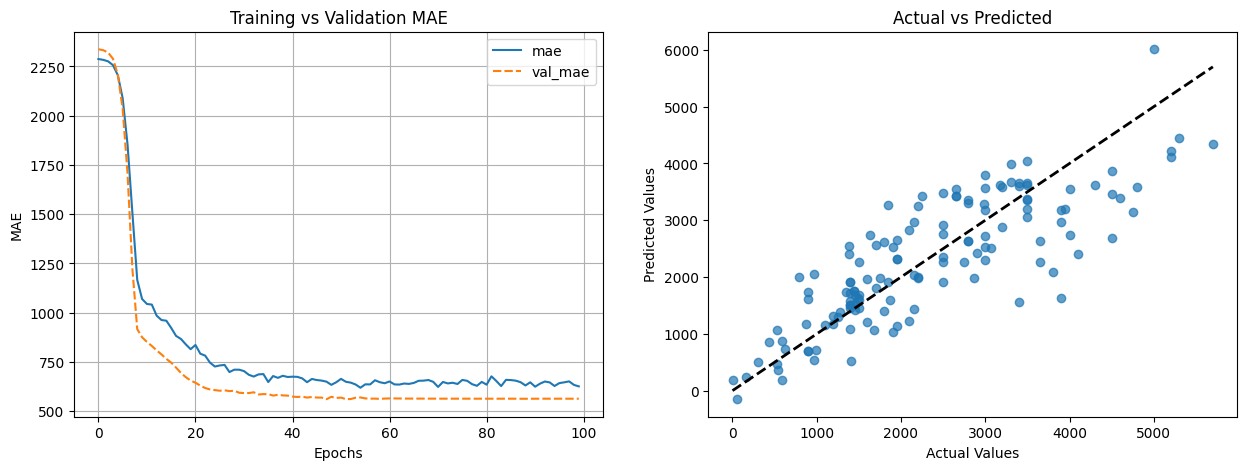

In [201]:
# Evaluate model
y_pred_val = model.predict(X_val_scaled)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
rmse = root_mean_squared_error(y_val, y_pred_val)
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"R-squared (R2 Score): {r2_val:.2f}")

# Visualize results
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))

# MAE plot
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['mae', 'val_mae']])
plt.title('Training vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.grid()

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_val, alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [202]:
# Evaluate model
y_pred_test = model.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [203]:
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE) - TRAIN: {mae_val:.2f}")
print(f"Mean Absolute Error (MAE) - TEST: {mae_test:.2f}")
print(f"R-squared (R2 Score) - TRAIN: {r2_val:.2f}")
print(f"R-squared (R2 Score) - TEST: {r2_test:.2f}")

Mean Absolute Error (MAE) - TRAIN: 563.01
Mean Absolute Error (MAE) - TEST: 700.25
R-squared (R2 Score) - TRAIN: 0.67
R-squared (R2 Score) - TEST: 0.61


In [204]:
# Save Model
model.save('data/model_ann.keras')